<h1>Lesson 4. Model selection: Car mileage</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/%22real_time_display%22_of_mileage_%28%22mpg%22%29_on_Honda_Insight.png/320px-%22real_time_display%22_of_mileage_%28%22mpg%22%29_on_Honda_Insight.png" style="height:200px;">
  
<p>In this exercise you will predict car mileage based on its properties. The data is taken from <a href="http://www-bcf.usc.edu/~gareth/ISL/">ISLR website</a>, but requires few transformations to make it usable for model building. These transformations will include: missing value imputation and normalizing the variables. </p>

<p>This dataset contains 397 car entries with following features:</p>
<ul>
<li>mpg miles per gallon (what we are trying to predict)</li>
<li>cylinders Number of cylinders between 4 and 8</li>
<li>displacement Engine displacement (cu. inches)</li>
<li>horsepower Engine horsepower</li>
<li>weight Vehicle weight (lbs.)</li>
<li>acceleration Time to accelerate from 0 to 60 mph (sec.)</li>
<li>year Model year (modulo 100)</li>
<li>origin Origin of car (1. American, 2. European, 3. Japanese)</li>
<li>name Vehicle name</ul>
</ul>


In [1]:
import pandas as pd

# Load the data
auto = pd.read_csv('data/Auto.csv')
print(auto.info())
auto.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      392 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
dtypes: float64(4), int64(4)
memory usage: 24.9 KB
None


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


<h3>Q.1. Write a command that will calculate the number of missing values in this dataset</h3>

In [2]:
# Command(s)

print("Number of missing values in each column:")
print(auto.isnull().sum())

print("\nTotal number of missing values in dataset:", auto.isnull().sum().sum())

Number of missing values in each column:
mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
dtype: int64

Total number of missing values in dataset: 5


<h3>Q.2. Write a command that will only show the rows with missing values. Can you comment on why the values might be missing (e.g. excessive prevalence of specific feature)?</h3>

In [3]:
# Command:
auto[auto.isnull().any(axis=1)]

# Comment (One - two sentence)
# Only values in the horsepower column are missing, and all other values are present. Looking at the histogram of all the 
# other columns, the values of the other features do not appear to be anomalous.

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,1
126,21.0,6,200.0,NaN,2875,17.0,74,1
330,40.9,4,85.0,NaN,1835,17.3,80,2
336,23.6,4,140.0,NaN,2905,14.3,80,1
354,34.5,4,100.0,NaN,2320,15.8,81,2


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

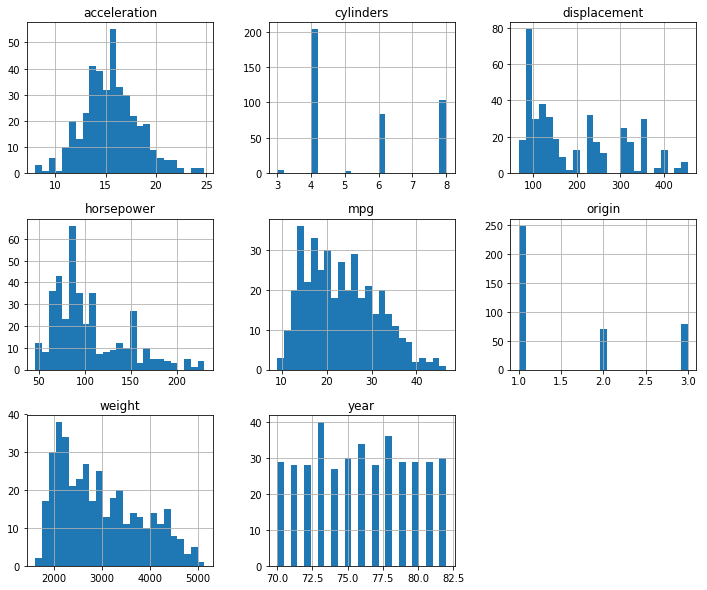

In [5]:
hist = auto.hist(bins=25, figsize=(12,10))

<h3>Q.3. Impute the missing values using median for the column. Given answer to Q.2, is this a good approach to fix the missing value problem?</h3>

In [6]:
# Command(s):
auto = auto.fillna(auto.median())

# Comment (one sentence):
# Only one column has missing values (horsepower), and the number of missing values is small (5 values out of 355 rows). 
# However, if you look at the horsepower histogram, you can see that the variance and skew is large, using the median
# is probably not the best option.

<h3>Q.4. Develop a model that predicts mpg using all the available features in the data.frame. Summarize it and comment on its quality. </h3>

In [7]:
import statsmodels.api as sm

In [8]:
# Develop the model 
# Get all features
target = 'mpg'
features = list(auto.drop(target,axis=1).columns.values)

y = auto[target]
X = auto[features]

model = sm.OLS(y, X).fit()

model.summary()

# Comment on its quality 
# The model has a large R-squared on the training set. However, the F-statistics, AIC, and BIC numbers are large, indicating 
# that the model will likely not do well on unseen data.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     2961.
Date:                Wed, 07 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:27:47   Log-Likelihood:                -1045.3
No. Observations:                 397   AIC:                             2105.
Df Residuals:                     390   BIC:                             2133.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.6770      0.324     -2.092      0.037      -1.313      -0.041
displacement     0.0212      0.008      2.780      0.006       0.006       0.036
horsepower      -0.0348      0.012     -2.820      0.005      -0.059      -0.011
weight          -0.0062      0.001     -9.673      0.000      -0.008      -0.005
acceleration    -0.0608      0.089     -0.682      0.495      -0.236       0.114
year             0.5820      0.024     24.186      0.000       0.535       0.629
origin           1.2785      0.279      4.576      0.000       0.729       1.828
==============================================================================
Omnibus:                       46.144   Durbin-Watson:                   1.266
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.987
Skew:                           0.677   Prob(JB):                     2.13e-19
Kurtosis:                       4.834   Cond. No.                     5.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3>Q.5. Show histogram of engine displacement to reveal its non-normal distribution. Normalize this feature by either applying Box-Cox transformation or any normalization tool from Scikit-learn. Plot this new feature to see whether it is now normally distributed.</h3>

In [10]:
from scipy import stats

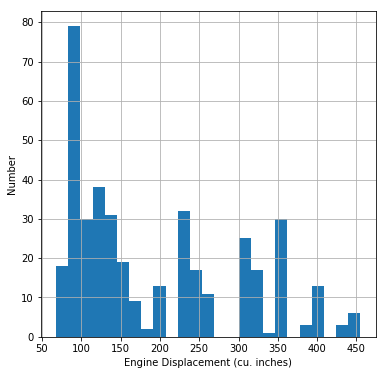

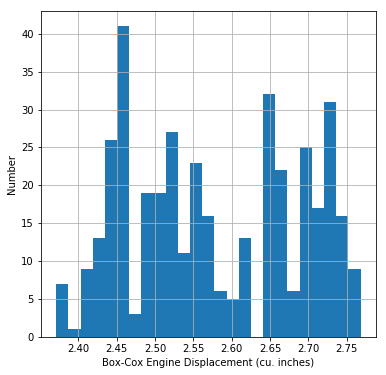

In [11]:
# Histogram of engine displacement
fig, ax = plt.subplots(figsize=(6,6))
ax = auto['displacement'].hist(bins=25, ax=ax)
ax.set_ylabel('Number')
ax.set_xlabel('Engine Displacement (cu. inches)')
plt.show()

auto['displacement_boxcox'] = stats.boxcox(auto['displacement'])[0]

# Plot histogram of this new feature to reveal normal-like distribution
fig, ax = plt.subplots(figsize=(6,6))
ax = auto['displacement_boxcox'].hist(bins=25, ax=ax)
ax.set_ylabel('Number')
ax.set_xlabel('Box-Cox Engine Displacement (cu. inches)')
plt.show()


<h3>Q.7. Recalculate the model to predict mpg with the new feature and comment on its performance in comparison to the original model.</h3>

In [12]:
# Calculate then new model
target = 'mpg'
features = list(auto.drop([target, 'displacement'],axis=1).columns.values)

y = auto[target]
X = auto[features]

model = sm.OLS(y, X).fit()

model.summary()
# Comment on its performance
# This model has nearly the same R-squared, only slightly lower AIC and BIC values, and a higher F-statistic. This model
# is not any better than the previous model, and it might be a little worse.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     3140.
Date:                Wed, 07 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:32:41   Log-Likelihood:                -1034.0
No. Observations:                 397   AIC:                             2082.
Df Residuals:                     390   BIC:                             2110.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
cylinders               0.4273      0.251      1.700      0.090      -0.067       0.921
horsepower              0.0040      0.013      0.314      0.753      -0.021       0.029
weight                 -0.0056      0.001     -9.795      0.000      -0.007      -0.004
acceleration            0.1008      0.093      1.086      0.278      -0.082       0.283
year                    0.8030      0.048     16.581      0.000       0.708       0.898
origin                  0.9649      0.257      3.751      0.000       0.459       1.471
displacement_boxcox   -10.3854      1.859     -5.586      0.000     -14.040      -6.730
==============================================================================
Omnibus:                       29.243   Durbin-Watson:                   1.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.636
Skew:                           0.465   Prob(JB):                     6.13e-12
Kurtosis:                       4.502   Cond. No.                     3.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3>Q.8. What is the mean and standard deviation for all the features?</h3>

In [15]:
features = list(auto.drop('mpg',axis=1).columns.values)
auto[features].describe().loc[['mean','std']]

,cylinders,displacement,horsepower,weight,acceleration,year,origin,displacement_boxcox
mean,5.458438,193.532746,104.331234,2970.261965,15.555668,75.994962,1.574307,2.579582
std,1.701577,104.379583,38.266994,847.904119,2.749995,3.690005,0.802549,0.110132


<h3>Q.9. Center all the features, so that their mean is 0 and scale them, so that their standard deviation is 1. Recalculate the model, comment on its performance.</h3>

In [16]:
from sklearn.preprocessing import StandardScaler

In [30]:
# Center and scale
target = 'mpg'
features = list(auto.drop([target, 'displacement_boxcox'],axis=1).columns.values)

scale = StandardScaler()

scaled_auto = auto.copy()

scaled_auto = scale.fit_transform(scaled_auto)
scaled_auto = pd.DataFrame(scaled_auto, columns=list(auto.columns.values))

print(scaled_auto[features].describe().loc[['mean','std']])

# Recalculate the model
y = scaled_auto[target]
X = scaled_auto[features]

model = sm.OLS(y, X).fit()

model.summary()

# Comment on its performance
# This model has a smaller R-squared value than the previous ones, but it also has a significantly lower F-statistic, AIC,
# and BIC, indicating that it will probably perform much better on unseen data.

         cylinders  displacement    horsepower        weight  acceleration  \
mean -7.645717e-16  5.956612e-17  2.295952e-16  1.510127e-17 -2.377052e-16   
std   1.001262e+00  1.001262e+00  1.001262e+00  1.001262e+00  1.001262e+00   

              year        origin  
mean  1.039191e-15 -8.221803e-17  
std   1.001262e+00  1.001262e+00  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.8
Date:                Wed, 07 Nov 2018   Prob (F-statistic):          9.44e-142
Time:                        04:46:11   Log-Likelihood:                -221.05
No. Observations:                 397   AIC:                             456.1
Df Residuals:                     390   BIC:                             484.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.0978      0.070     -1.396      0.163      -0.236       0.040
displacement     0.2559      0.100      2.558      0.011       0.059       0.453
horsepower      -0.0538      0.066     -0.816      0.415      -0.183       0.076
weight          -0.7257      0.070    -10.424      0.000      -0.863      -0.589
acceleration     0.0389      0.034      1.139      0.256      -0.028       0.106
year             0.3589      0.024     15.050      0.000       0.312       0.406
origin           0.1442      0.028      5.100      0.000       0.089       0.200
==============================================================================
Omnibus:                       29.910   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.012
Skew:                           0.508   Prob(JB):                     3.75e-11
Kurtosis:                       4.367   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""